<a href="https://colab.research.google.com/github/SakshiShukla26/centra/blob/master/HousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
sample=pd.read_csv("House pricing.csv")
sample

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
sample.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
sample.isna().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [ ]:
sample.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


<Axes: >

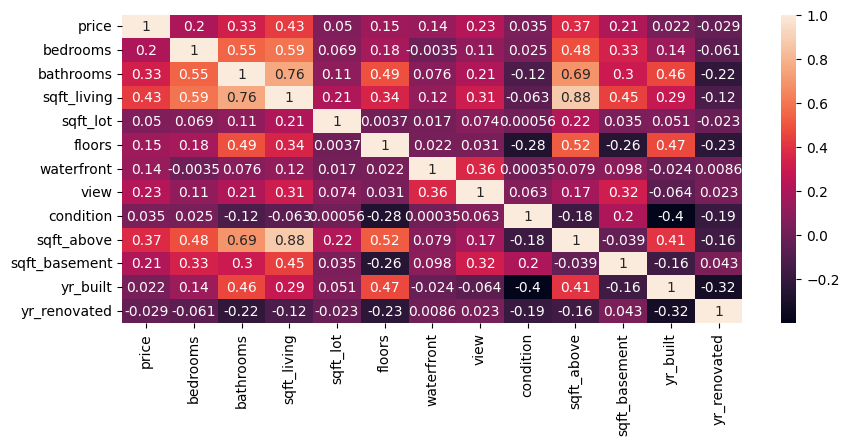

In [ ]:
correl=sample.corr(numeric_only=True)
ax=plt.subplots(figsize=(10,4))
sns.heatmap(correl,annot=True)

In [ ]:
sample.bedrooms.value_counts()

,count
bedrooms,
3.0,2032
4.0,1531
2.0,566
5.0,353
6.0,61
1.0,38
7.0,14
8.0,2
0.0,2


In [ ]:
sample.columns


Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
sample.bathrooms.value_counts()

,count
bathrooms,
2.50,1189
1.00,743
1.75,629
2.00,427
2.25,419
1.50,291
2.75,276
3.00,167
3.50,162


In [ ]:
sample.sqft_living.value_counts()

,count
sqft_living,
1940,32
1720,32
1660,31
1840,31
2000,30
...,...
2732,1
2009,1
1295,1


In [ ]:
sample.sqft_above.value_counts()

,count
sqft_above,
1200,47
1010,47
1300,45
1140,44
1320,43
...,...
2481,1
560,1
2437,1


In [ ]:
sample.waterfront.value_counts()

,count
waterfront,
0,4567
1,33


In [ ]:
sample.floors.value_counts()


,count
floors,
1.0,2174
2.0,1811
1.5,444
3.0,128
2.5,41
3.5,2


In [ ]:
sample.yr_built.value_counts()

,count
yr_built,
2006,111
2005,104
2007,93
2004,92
1978,90
...,...
1915,6
1935,6
1933,5


In [ ]:
sample.yr_renovated.value_counts()


,count
yr_renovated,
0,2735
2000,170
2003,151
2009,109
2001,109
2005,95
2004,77
2014,72
2006,68


In [ ]:
sample.sqft_basement.value_counts()




,count
sqft_basement,
0,2745
500,53
600,45
800,43
900,41
...,...
2300,1
265,1
1610,1


Prediction using multiple linear regression


In [ ]:
sample = sample.drop(['date', 'street', 'city', 'statezip', 'country'], axis=1)
x = sample.drop('price', axis=1)
y = sample['price']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3680, 12)
(920, 12)
(3680,)
(920,)


In [ ]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
model=LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test_scaled)
y_pred

array([ 304863.38578065,  326517.0699151 , 1071762.53630093,
        546241.40097353,  379799.98321085,  605792.93622745,
        481263.57120648,  418905.11058134,  509341.50791918,
        530852.97588253,  682958.97641212,  414525.36130053,
        836974.40259898,  416500.85730815,  367263.4338822 ,
        702908.51672189,  677878.69067825,  515539.32998878,
       1019380.63891384,  861119.79490708, 1364866.21814691,
        637439.7001677 ,  634739.56666331,  470424.21250262,
        162037.15383035,  232831.37648238,  669951.05071599,
        884080.66694996,  263027.225772  ,  974954.6422947 ,
       1883342.16391313,  481510.29664856, 1275554.65253717,
        430994.93178865,  180366.40705418,  339240.1735742 ,
        792335.74094013, 1011053.14613385,  238036.20927671,
        543438.66040776,  423414.50597293,  243429.92107969,
        390151.30074032,  361322.67375673,  320343.34636012,
        317865.29287641,  469559.6064662 ,  573249.20158968,
        828966.75691609,

In [ ]:
mse=mean_squared_error(y_test,y_pred)
mse

986921767056.1313

In [ ]:
r2=r2_score(y_test,y_pred)
r2

0.03228385663277078

In [ ]:
mae=mean_absolute_error(y_test,y_pred)
mae

210908.1732501152

In [ ]:
new_data = pd.DataFrame({
    'bedrooms': [3],
    'bathrooms': [2],
    'sqft_living': [1800],
    'sqft_lot': [5000],
    'floors': [1],
    'waterfront': [0],
    'view': [0],
    'condition': [3],
    'sqft_above': [1800],
    'sqft_basement': [0],
    'yr_built': [1990],
    'yr_renovated': [0]
})

# Apply the same scaler used on the training data
new_data_scaled = scaler.transform(new_data)

# Make a prediction
predicted_price = model.predict(new_data_scaled)
print(f"Predicted Price: ${predicted_price[0]:,.2f}")

Predicted Price: $357,049.61
